In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.stats import linregress

mpl.rc('lines', markersize=6)

font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 22}

mpl.rc('font', **font)

%matplotlib inline

In [2]:
def I2B(I):
    mu0 = 4*np.pi*10**(-7) #T*m/A
    n = 195
    R = (10+11.4)/2*1/100 #m
    return (4/5)**(3/2)*mu0*n*I/R #T

def IZ2dB(I, z, z0):
    mu0 = 4*np.pi*10**(-7) #T*m/A
    n = 195
    R = (10+11.4)/2*1/100 #m
    dz = 12.4/100 #m
    # z0=-dz/2
    return 3*mu0/2*R**2*I*((z+dz/2+z0)/((z+dz/2+z0)**2+R**2)**(5/2)-(z-dz/2+z0)/((z-dz/2+z0)**2+R**2)**(5/2))
    # return 3*mu0/2*R**2*I*(z/(z**2+R**2)**(5/2)-(z+dz)/((z+dz)**2+R**2)**(3/2))
    # return mu0/2*R**2*I*(1/(z**2+R**2)**(3/2)-1/((z+dz)**2+R**2)**(3/2))

def myscatter(x, y, xlabel, ylabel, title, fig, ax):
    res = linregress(x, y)

#     print(f'''y0 = {res.intercept}
# m  = {res.slope}''')

    ax.grid()
    ax.scatter(x, y, label="Experiment");
    ax.plot(x, res.intercept + res.slope*x, label="Fit")
    ax.legend()
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title);
    ax.set_xlim(min(x)-0.05*min(x), max(x)+0.05*max(x))
    ax.set_ylim(min(y)-0.05*min(y), max(y)+0.05*max(y))
    return res

In [3]:
df_torque = pd.read_excel("Magnetic.xlsx", "Net Torque")
# df_torque
# df_torque.iloc[1:5].plot("a", "Unnamed: 4", kind="scatter", grid=True);

\mu = 0.5110094229998137 \pm 0.04680906457723325 A*m^2


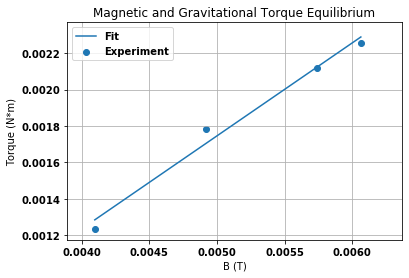

In [4]:
B_torque = I2B(df_torque["a"][1:5].to_numpy()).astype(float)
r_torque = df_torque["Unnamed: 4"][1:5].to_numpy().astype(float)

mg = 9.81*0.002

fig, ax = plt.subplots(1, 1);
res_torque = myscatter(B_torque, r_torque*mg, "B (T)", "Torque (N*m)", "Magnetic and Gravitational Torque Equilibrium", fig, ax)

mu_torque, muerr_torque = res_torque.slope, res_torque.stderr
print(f"\mu = {mu_torque} \pm {muerr_torque} A*m^2")

In [5]:
df_harmonic = pd.read_excel("Magnetic.xlsx", "Harmonic")
# df_harmonic
# df_harmonic.iloc[3:10].plot("Unnamed: 1", "c", kind="scatter", grid=True);


\mu = 0.3607813817935969 \pm 0.016966591420962636 A*m^2


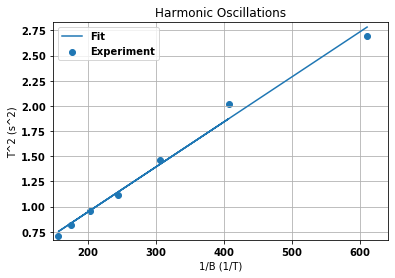

In [6]:
invB_harmonic = 1/I2B(df_harmonic["Unnamed: 1"][3:10].to_numpy()).astype(float)
T2_harmonic = (df_harmonic["c"][3:10].to_numpy().astype(float)/20)**2

M, R = 0.1402, 0.027 #Cue ball mass (kg), radius (m)
I = 2/5*M*R**2

fig, ax = plt.subplots(1, 1);
res_harmonic = myscatter(invB_harmonic, T2_harmonic, "1/B (1/T)", "T^2 (s^2)", "Harmonic Oscillations", fig, ax)

mu_harmonic = 1/res_harmonic.slope*4*np.pi**2*I
perr = res_harmonic.stderr/res_harmonic.slope
muerr_harmonic = mu_harmonic*perr #np.sqrt(res_harmonic.stderr**2*(1/mu_harmonic)**2)*4*np.pi**2*I
print(f"\mu = {mu_harmonic} \pm {muerr_harmonic} A*m^2")

In [7]:
df_precess = pd.read_excel("Magnetic.xlsx", "Precession")
# df_precess
# df_precess.iloc[2:8].plot("Precession", "Unnamed: 1", kind="scatter", grid=True);


\mu = 0.43228062727667727 \pm 0.0900732151941762 A*m^2


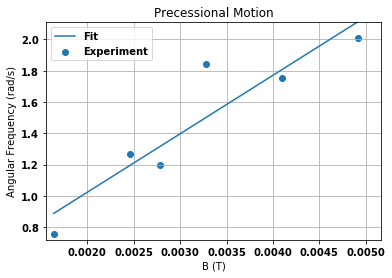

In [8]:
B_precess = I2B(df_precess["Precession"][2:8].to_numpy()).astype(float)
freq_precess = 2*np.pi/((df_precess["Unnamed: 1"][2:8].to_numpy().astype(float))/5)

V=2*np.pi*4.5
L=I*V

fig, ax = plt.subplots(1, 1);
res_precess = myscatter(B_precess, freq_precess, "B (T)", "Angular Frequency (rad/s)", "Precessional Motion", fig, ax)

mu_precess, muerr_precess = res_precess.slope*L, res_precess.stderr*L
print(f"\mu = {mu_precess} \pm {muerr_precess} A*m^2")

In [9]:
df_spring = pd.read_excel("Magnetic.xlsx", "Spring")
# df_spring
# df_spring.iloc[0:5].plot("m", "cm", kind="scatter", grid=True);
# df_spring.iloc[10:19].plot("m", "cm", kind="scatter", grid=True);

k = 0.8613659531090725 \pm 0.012826765945073645 N/m


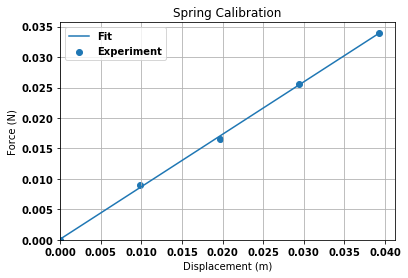

In [10]:
# Calibration F=kx
M_calib = df_spring["m"][0:5].to_numpy().astype(float)/1000
X_calib = df_spring["cm"][0:5].to_numpy().astype(float)/100
X_calib = -X_calib + max(X_calib)

fig, ax = plt.subplots(1, 1);
res_calib = myscatter(M_calib*9.81, X_calib, "Displacement (m)", "Force (N)", "Spring Calibration", fig, ax)

k, kerr = np.abs(res_calib.slope), res_calib.stderr
print(f"k = {k} \pm {kerr} N/m")

\mu = 0.5188941530176527 \pm 0.019288455970941854 A*m^2


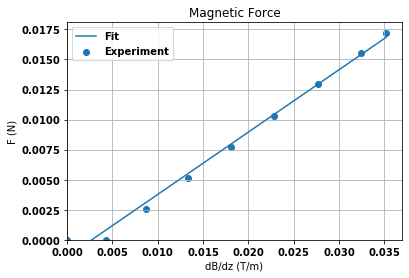

In [11]:
I_spring = df_spring["m"][10:19].to_numpy().astype(float)
z_spring = df_spring["cm"][10:19].to_numpy().astype(float)/100

z0 = -0.02 #2cm from bottom edge
dB_spring = IZ2dB(I_spring, z_spring, z0)*100

fig, ax = plt.subplots(1, 1);
res_spring = myscatter(dB_spring, z_spring*k, "dB/dz (T/m)", "F (N)", "Magnetic Force", fig, ax)

mu_spring, muerr_spring = np.abs(res_spring.slope), res_spring.stderr
print(f"\mu = {mu_spring} \pm {muerr_spring} A*m^2")

In [12]:
mu = (mu_torque/muerr_torque+mu_harmonic/muerr_harmonic+mu_precess/muerr_precess+mu_spring/muerr_spring)/(1/muerr_torque+1/muerr_harmonic+1/muerr_precess+1/muerr_spring)
muerr = 1/(1/muerr_torque+1/muerr_harmonic+1/muerr_precess+1/muerr_spring)
print(f"\mu = {mu} \pm {muerr} A*m^2")

\mu = 0.4459506917324768 \pm 0.006980836791817159 A*m^2
